# COMP47670 Assignment 2

### Student Number: 22202307

In this analysis, we will be working with customer satisfaction data from a bank. The data has been collected through customer feedback surveys and contains both tabular and text data.

The tabular data includes information such as customer ID, date, account balance, and loan status, while the text data consists of customer comments regarding their satisfaction level with the bank's services.

The aim of this analysis is to classify customer satisfaction as either positive or negative based on the available data. We will explore and compare the performance of different machine learning models using both the tabular and text data representations.

Through this analysis, we hope to gain insights into the key factors driving customer satisfaction and identify areas where the bank can improve its services to enhance customer experience.

The code imports various Python libraries used in the analysis, such as numpy, pandas, matplotlib, seaborn, and scikit-learn. It also imports specific functions from these libraries, such as GridSearchCV, GaussianNB, LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, accuracy_score, confusion_matrix, classification_report, SMOTE, and XGBClassifier. Additionally, the code imports specific functions from other libraries, such as variance_inflation_factor from statsmodels.stats.outliers_influence and zscore from scipy.stats. Finally, the code imports RandomizedSearchCV from scikit-learn for performing randomized search cross-validation.

In [9]:
#Import all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import time
import numpy as np
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV


The code defines a function called readCsv which takes a file location as input and returns a pandas dataframe containing the data from the csv file located at that location. The function uses the pandas read_csv method to read the data, and sets the delimiter parameter to '\t' since the file is tab-separated. The function then returns the data as a pandas dataframe.

In [10]:
#def readCsv(fileLocation):    # Function to read the csv file
    #data = pd.read_csv(fileLocation,delimiter= '\t')
    #return data;

The code reads the CSV file located at the specified URL using pd.read_csv() with the delimiter set to '\t' and assigns the resulting DataFrame to the variable dataset.

In [11]:
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# url='/content/drive/MyDrive/dataset/bank-tabular.csv'
#url="file location"
dataset=pd.read_csv('bank-tabular.csv',delimiter= '\t')

dataset


,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,58770,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,f,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,79364,2021-08-01,m,NaN,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,371134,2021-06-25,m,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True



The code consists of several functions used in machine learning modeling.

The first function lengthOfDataframe returns the length of the unique values in a particular column of the dataframe.

The second function countOfNAValues counts the number of missing values in each column of the dataset.

The third function splitCategoricalColumns returns a subset of the dataframe consisting of only categorical columns.

The fourth function split_data_for_model_training splits the dataset into training and testing sets and returns them.

The fifth function model_building takes in the algorithm, training and testing features, and labels, fits the model, and predicts the output value.

In [12]:
# function to check the length of dataframe
def lengthOfDataframe(data,column):
    return len(set(data[column]))

# function to check the number of NA values in each column
def countOfNAValues(data):
    return data.isna().sum()
# separate categorical columns from the dataset
def splitCategoricalColumns(data):
    categorical_data = data.select_dtypes(exclude=[np.number])
    return categorical_data

# split the dataset as test and train
def split_data_for_model_training(data,target):
    x_features= data.iloc[:,data.columns != target]
    y_labels=data.iloc[:,data.columns== target]
    x_features_train,x_features_test,y_labels_train,y_labels_test = train_test_split(x_features,y_labels,test_size=0.3)
    print("Length of training data : ", len(x_features_train))
    print("length of test data : ", len(x_features_test))
    return(x_features_train,x_features_test,y_labels_train,y_labels_test)

# function to fit the model and predict the output value
def model_building(algorithm_name,features_train,features_test,labels_train,labels_test):
    clf= algorithm_name
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    return pred


This code prints the number of unique values in the column 'customer_id' of the dataset 'dataset' using the 'lengthOfDataframe' function.

In [13]:
print(lengthOfDataframe(dataset,'customer_id'))

3000



This code separates categorical columns from the dataset and returns the first 5 rows of the resulting categorical_data dataframe using the head() function.

In [14]:
categorical_data = splitCategoricalColumns(dataset)
categorical_data.head()

,date,customer_gender,customer_location,customer_type,has_cc,has_mortgage,satisfied
0,2022-08-22,Male,Munster,Personal,True,False,True
1,2022-11-23,Female,Leinster,Personal,True,False,True
2,2022-01-21,Female,Munster,Business,True,False,True
3,2022-03-13,f,Leinster,Business,True,False,True
4,2022-08-08,Female,Leinster,Personal,True,True,False


This code checks for the number of duplicate records in the dataset and prints the count as a formatted string.

In [15]:
print(f"There are {dataset.duplicated().sum()} duplicate records found in inputdataframe.")

There are 0 duplicate records found in inputdataframe.



This code prints the number of missing (null) values for each column in the dataset.

In [16]:
print(countOfNAValues(dataset))

customer_id                0
date                       0
customer_gender          312
customer_age             470
customer_location        365
customer_type              0
has_cc                     0
has_mortgage               0
convenience               64
customer_service          29
online_banking            30
interest_rates           165
fees_charges              76
community_involvement    300
products_services        100
privacy_security         262
reputation               402
satisfied                  0
dtype: int64


This code prints out the unique values present in the 'customer_gender', 'customer_location' and 'customer_type' columns of the 'dataset' dataframe.

In [17]:
uniqueValues_job = dataset['customer_gender'].unique()
print('Gender: ',uniqueValues_job)
uniqueValues_job = dataset['customer_location'].unique()
print('Location: ',uniqueValues_job)
uniqueValues_job = dataset['customer_type'].unique()
print('Type: ',uniqueValues_job)

Gender:  ['Male' 'Female' 'f' 'Unspecified' nan 'm' 'Not specified']
Location:  ['Munster' 'Leinster' nan 'Connacht' 'Ulster']
Type:  ['Personal' 'Business' 'Business-Plus']


These lines of code are trying to identify unique values in the 'has_cc', 'has_mortgage', and 'satisfied' columns of the dataset and printing them to the console.

In [18]:
uniqueValues_job = dataset['has_cc'].unique()
print('has_cc: ',uniqueValues_job)
uniqueValues_job = dataset['has_mortgage'].unique()
print('has_mortgage: ',uniqueValues_job)
uniqueValues_job = dataset['satisfied'].unique()
print('satisfied: ',uniqueValues_job)

has_cc:  [ True False]
has_mortgage:  [False  True]
satisfied:  [ True False]


The code above replaces values in the 'customer_gender' column of the dataset with their corresponding more readable values, and then prints out the unique values in the 'customer_gender' column after the replacement.

In [19]:
dataset = dataset.replace({'customer_gender' :{'f' : 'Female','Female' : 'Female','Male' : 'Male', 'm' : 'Male', 'Unspecified' : 'Not specified'}})
dataset
uniqueValues_job = dataset['customer_gender'].unique()
print('Gender: ',uniqueValues_job)

Gender:  ['Male' 'Female' 'Not specified' nan]


Drops the rows from the 'customer_gender' column that contain missing values and prints the count of missing values in each column after the removal.

In [20]:
# Drop the Na value rows from Gender column as it is impacting the whole dataset with more than 30 records in each coulumn
dataset.dropna(subset=["customer_gender"], inplace=True)
print(countOfNAValues(dataset))

customer_id                0
date                       0
customer_gender            0
customer_age             420
customer_location        323
customer_type              0
has_cc                     0
has_mortgage               0
convenience               58
customer_service          26
online_banking            28
interest_rates           154
fees_charges              65
community_involvement    270
products_services         90
privacy_security         238
reputation               365
satisfied                  0
dtype: int64


 The code is dropping the rows with missing values in specific columns (products_services, reputation, community_involvement, privacy_security, and interest_rates) from the dataset and then checking the count of missing values in the updated dataset using the countOfNAValues() function.

In [21]:
dataset.dropna(subset=["products_services"], inplace=True)
dataset.dropna(subset=["reputation"], inplace=True)
dataset.dropna(subset=["community_involvement"], inplace=True)
dataset.dropna(subset=["privacy_security"], inplace=True)
dataset.dropna(subset=["interest_rates"], inplace=True)

print(countOfNAValues(dataset))

customer_id                0
date                       0
customer_gender            0
customer_age             275
customer_location        196
customer_type              0
has_cc                     0
has_mortgage               0
convenience               37
customer_service          14
online_banking            14
interest_rates             0
fees_charges              44
community_involvement      0
products_services          0
privacy_security           0
reputation                 0
satisfied                  0
dtype: int64


This code fills the missing values in the columns 'fees_charges', 'customer_service', 'online_banking' and 'convenience' of the 'dataset' dataframe with the mean or median of each column, respectively.

In [22]:
mean_age = dataset['fees_charges'].mean()
dataset['fees_charges'].fillna(mean_age, inplace=True)
mean_age = dataset['customer_service'].median()
dataset['customer_service'].fillna(mean_age, inplace=True)
mean_age = dataset['online_banking'].mean()
dataset['online_banking'].fillna(mean_age, inplace=True)
mean_age = dataset['convenience'].median()
dataset['convenience'].fillna(mean_age, inplace=True)

The first line of code prints the length of the unique values in the "customer_id" column of the dataset using the lengthOfDataframe() function. The second line of code prints the count of missing values in each column of the dataset using the countOfNAValues() function.

In [23]:
print(lengthOfDataframe(dataset,'customer_id'))
print(countOfNAValues(dataset))

1730
customer_id                0
date                       0
customer_gender            0
customer_age             275
customer_location        196
customer_type              0
has_cc                     0
has_mortgage               0
convenience                0
customer_service           0
online_banking             0
interest_rates             0
fees_charges               0
community_involvement      0
products_services          0
privacy_security           0
reputation                 0
satisfied                  0
dtype: int64



The code is calculating and imputing the mode value to replace the NaN values in the 'customer_age' column of the dataset. It prints the number of missing values before and after imputation and uses the countOfNAValues() function to verify that there are no missing values left in the dataset.

In [24]:
# Mode Imputation for Nan Value
# count the number of missing values in the gender column
missing_values = dataset["customer_age"].isnull().sum()
print(f"Number of missing values in gender column: {missing_values}")

# calculate the mode of the gender column
mode_gender = dataset["customer_age"].mode()[0]

# fill the missing values with the mode of the gender column
dataset["customer_age"].fillna(mode_gender, inplace=True)

# verify that there are no missing values in the gender column
missing_values = dataset["customer_age"].isnull().sum()
print(f"Number of missing values in gender column after imputation: {missing_values}")
print(countOfNAValues(dataset))

Number of missing values in gender column: 275
Number of missing values in gender column after imputation: 0
customer_id                0
date                       0
customer_gender            0
customer_age               0
customer_location        196
customer_type              0
has_cc                     0
has_mortgage               0
convenience                0
customer_service           0
online_banking             0
interest_rates             0
fees_charges               0
community_involvement      0
products_services          0
privacy_security           0
reputation                 0
satisfied                  0
dtype: int64


The code imputes missing values in the "customer_location" column of the dataset using mode imputation technique. It counts the number of missing values before and after imputation to check if any values are left.

In [25]:
# Mode Imputation for Nan Value
# count the number of missing values in the gender column
missing_values = dataset["customer_location"].isnull().sum()
print(f"Number of missing values in gender column: {missing_values}")

# calculate the mode of the gender column
mode_gender = dataset["customer_location"].mode()[0]

# fill the missing values with the mode of the gender column
dataset["customer_location"].fillna(mode_gender, inplace=True)

# verify that there are no missing values in the gender column
missing_values = dataset["customer_location"].isnull().sum()
print(f"Number of missing values in gender column after imputation: {missing_values}")
print(countOfNAValues(dataset))

Number of missing values in gender column: 196
Number of missing values in gender column after imputation: 0
customer_id              0
date                     0
customer_gender          0
customer_age             0
customer_location        0
customer_type            0
has_cc                   0
has_mortgage             0
convenience              0
customer_service         0
online_banking           0
interest_rates           0
fees_charges             0
community_involvement    0
products_services        0
privacy_security         0
reputation               0
satisfied                0
dtype: int64


In [26]:
dataset

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
3,58770,2022-03-13,Female,32.0,Leinster,Business,True,False,3.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
5,241092,2021-01-30,Female,71.0,Leinster,Personal,False,True,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,Female,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,79364,2021-08-01,Male,32.0,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,371134,2021-06-25,Male,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True


This code block is converting the data type of the columns in the dataset dataframe. It is converting the following columns to integer data type: "customer_age", "convenience", "customer_service", "online_banking", "interest_rates", "fees_charges", "community_involvement", "products_services", "privacy_security", and "reputation". By default, Pandas reads the data types of columns from the CSV file and sometimes it is necessary to convert the data types for certain columns to perform operations or analysis on the data.

In [27]:
dataset["customer_age"] = dataset["customer_age"].astype(int)
dataset["convenience"] = dataset["convenience"].astype(int)
dataset["customer_service"] = dataset["customer_service"].astype(int)
dataset["online_banking"] = dataset["online_banking"].astype(int)
dataset["interest_rates"] = dataset["interest_rates"].astype(int)
dataset["fees_charges"] = dataset["fees_charges"].astype(int)
dataset["community_involvement"] = dataset["community_involvement"].astype(int)
dataset["products_services"] = dataset["products_services"].astype(int)
dataset["privacy_security"] = dataset["privacy_security"].astype(int)
dataset["reputation"] = dataset["reputation"].astype(int)

dataset

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50,Munster,Personal,True,False,4,5,4,4,4,4,5,2,4,True
1,259276,2022-11-23,Female,61,Leinster,Personal,True,False,5,5,5,3,5,4,4,5,5,True
3,58770,2022-03-13,Female,32,Leinster,Business,True,False,3,4,5,1,5,5,5,5,5,True
4,318031,2022-08-08,Female,41,Leinster,Personal,True,True,1,1,1,1,2,2,4,5,2,False
5,241092,2021-01-30,Female,71,Leinster,Personal,False,True,3,3,4,3,3,3,3,3,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41,Munster,Personal,True,True,3,3,3,3,5,3,3,1,5,False
2996,53418,2021-03-07,Female,57,Munster,Business,False,False,3,2,5,1,2,2,2,2,3,True
2997,79364,2021-08-01,Male,32,Munster,Personal,True,True,3,3,3,4,4,3,4,4,4,False
2998,371134,2021-06-25,Male,42,Leinster,Business,False,False,3,2,1,5,4,4,3,4,1,True


 VISUALIZATION

The code generates a heatmap of the correlation matrix for the numeric columns of the dataset. The seaborn library is used for visualization, and the matplotlib library is used for figure size configuration. The correlation matrix is computed using the Pandas DataFrame corr() method. The heatmap displays the correlation coefficient between each pair of variables, and the coefficients are annotated on the heatmap.

<AxesSubplot:>

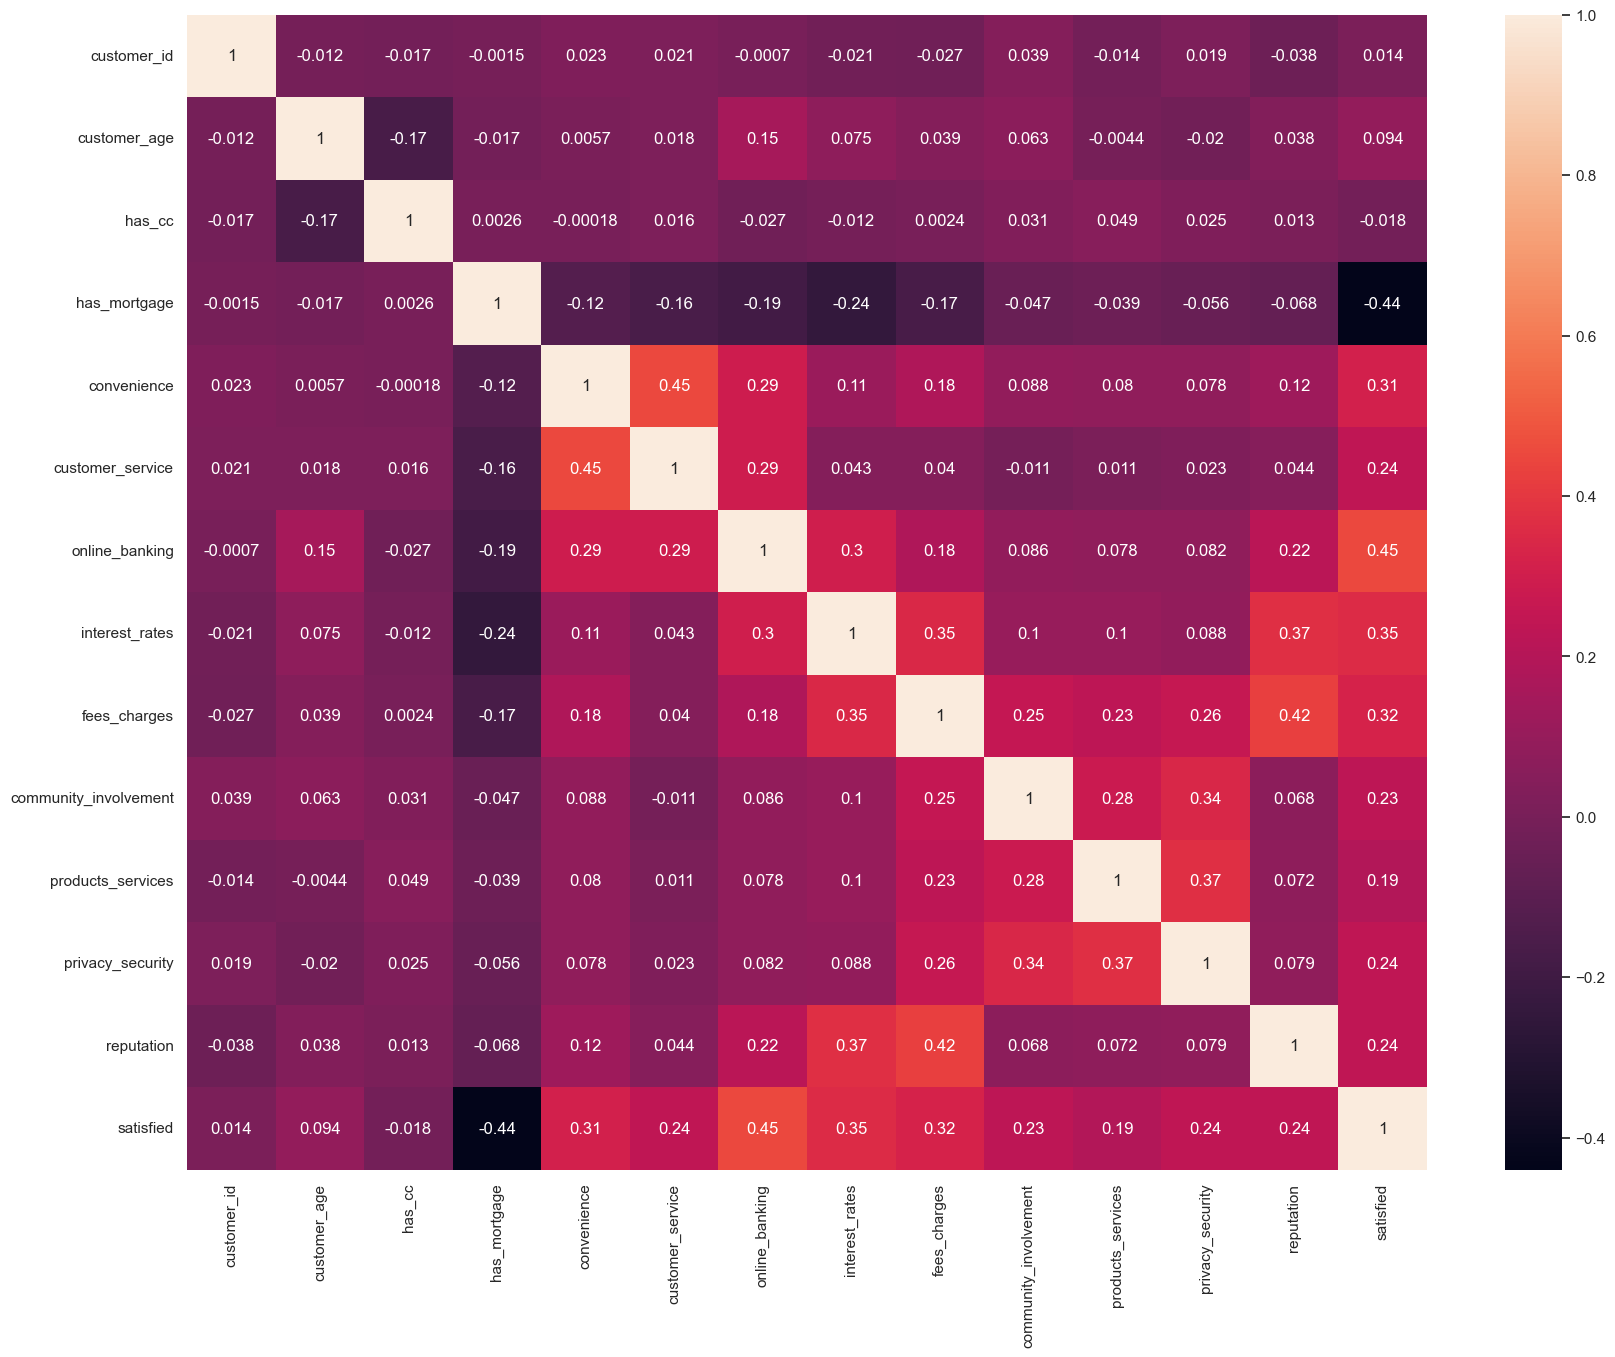

In [28]:
correlation = dataset.corr()

sns.set_theme()

plt.figure(figsize = (20,15))

sns.heatmap(correlation, cbar = True, annot = True)


This code generates a boxplot of the 'customer_age' column in the dataset. The boxplot is a graphical representation of the distribution of the data points and shows the median, quartiles, and outliers in the data.

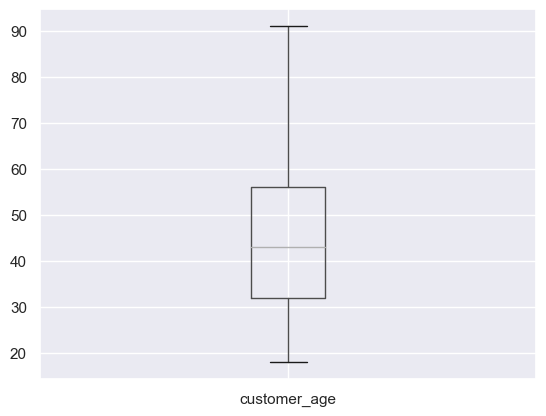

In [29]:
dataset.boxplot(column='customer_age', return_type='axes');

The first line of code creates a plot showing the count of each value in the 'satisfied' column of the dataset using seaborn's countplot function.

The second line sets the title of the plot.

The third line displays the plot.

The fourth line outputs the count of each value in the 'satisfied' column of the dataset.

The fifth line simply outputs the dataset again.

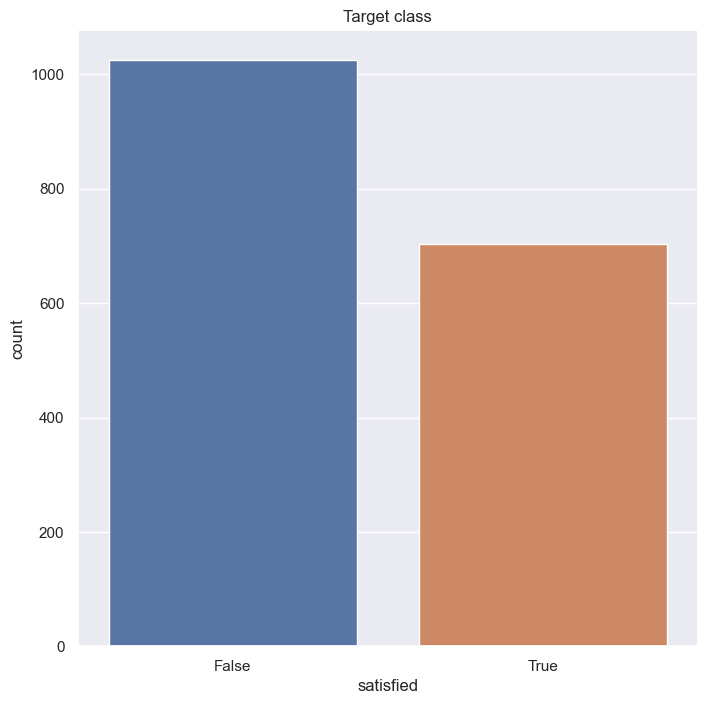

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50,Munster,Personal,True,False,4,5,4,4,4,4,5,2,4,True
1,259276,2022-11-23,Female,61,Leinster,Personal,True,False,5,5,5,3,5,4,4,5,5,True
3,58770,2022-03-13,Female,32,Leinster,Business,True,False,3,4,5,1,5,5,5,5,5,True
4,318031,2022-08-08,Female,41,Leinster,Personal,True,True,1,1,1,1,2,2,4,5,2,False
5,241092,2021-01-30,Female,71,Leinster,Personal,False,True,3,3,4,3,3,3,3,3,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41,Munster,Personal,True,True,3,3,3,3,5,3,3,1,5,False
2996,53418,2021-03-07,Female,57,Munster,Business,False,False,3,2,5,1,2,2,2,2,3,True
2997,79364,2021-08-01,Male,32,Munster,Personal,True,True,3,3,3,4,4,3,4,4,4,False
2998,371134,2021-06-25,Male,42,Leinster,Business,False,False,3,2,1,5,4,4,3,4,1,True


In [30]:
plt.figure(figsize=(8, 8))
sns.countplot(x='satisfied', data=dataset)
plt.title('Target class')
plt.show()
dataset['satisfied'].value_counts()
dataset


The code is creating a pie chart to visualize the percentage of different types of customers who have given reviews.

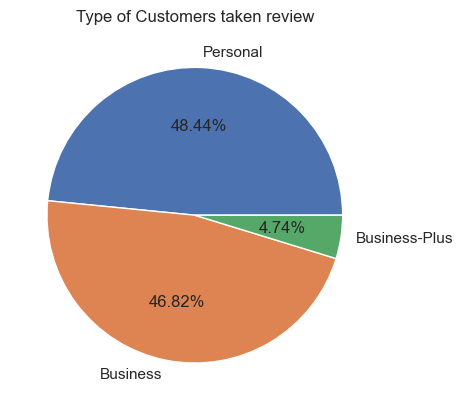

In [31]:
plt.pie(dataset['customer_type'].value_counts(), labels=['Personal', 'Business','Business-Plus'], autopct='%1.2f%%')
plt.title('Type of Customers taken review')
plt.show()

This code creates age bins and labels for customers based on their age, groups customers by age range and type, and then creates a stacked bar chart of the count of customers in each age range by customer type.

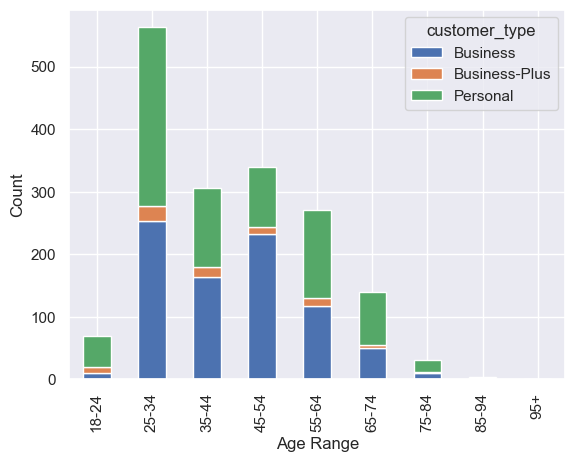

In [32]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85-94", "95+"]
dataset["customer_age_bins"] = pd.cut(dataset["customer_age"], bins=age_bins, labels=age_labels)
job_counts = dataset.groupby(["customer_age_bins", "customer_type"]).size().unstack()
job_counts.plot(kind='bar', stacked=True)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

The code above creates a stacked bar chart showing the count of male and female customers within different age ranges. The age ranges are defined by the age_bins list and their corresponding labels are defined by the age_labels list. The chart is displayed using matplotlib and pandas plotting functions.

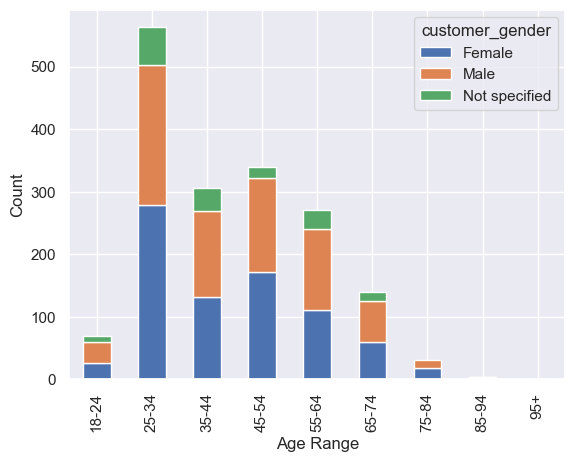

In [33]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85-94", "95+"]
job_counts = dataset.groupby(["customer_age_bins", "customer_gender"]).size().unstack()
job_counts.plot(kind='bar', stacked=True)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

The code creates a stacked bar chart showing the count of male and female customers within different age ranges. The age ranges are defined by the age_bins list and their corresponding labels are defined by the age_labels list. The chart is displayed using matplotlib and pandas plotting functions.

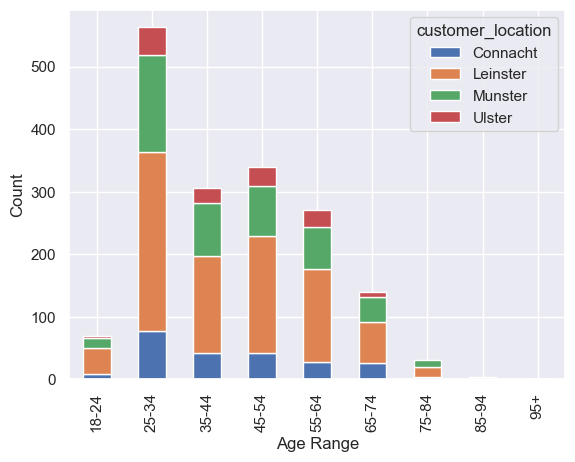

In [34]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85-94", "95+"]
job_counts = dataset.groupby(["customer_age_bins", "customer_location"]).size().unstack()
job_counts.plot(kind='bar', stacked=True)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

The code creates a cross-tabulation table using pandas crosstab function to show the relationship between the convenience rating and customer gender. The resulting table is plotted as a stacked bar chart using matplotlib, with the x-axis representing the rating and the y-axis representing the count.

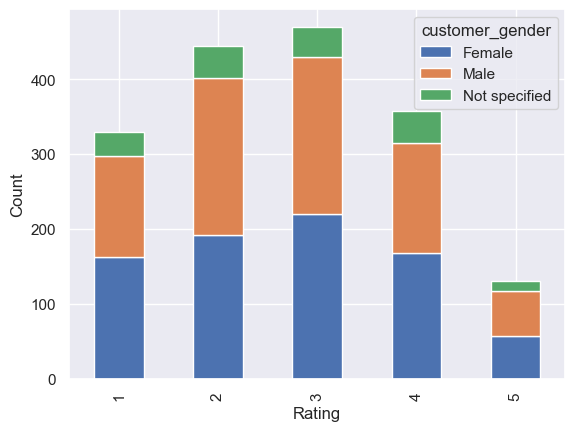

In [35]:
#@title Default title text
# create a cross-tabulation table of convenience rating vs customer_gender
table = pd.crosstab(dataset["convenience"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a crosstabulation table of the customer_service column against customer_gender column and visualizes the count of each rating stacked on top of each other using a bar chart. The x-axis represents the different rating values, while the y-axis represents the count of each rating for each gender category.

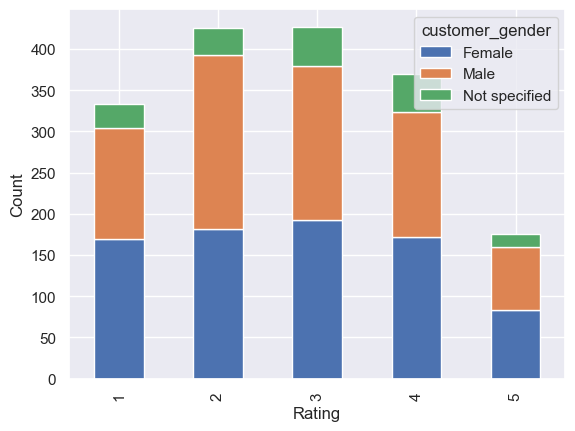

In [36]:
# customer_service
table = pd.crosstab(dataset["customer_service"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of the online_banking rating vs the customer_gender and displays a stacked bar chart showing the count of each rating for each gender category.

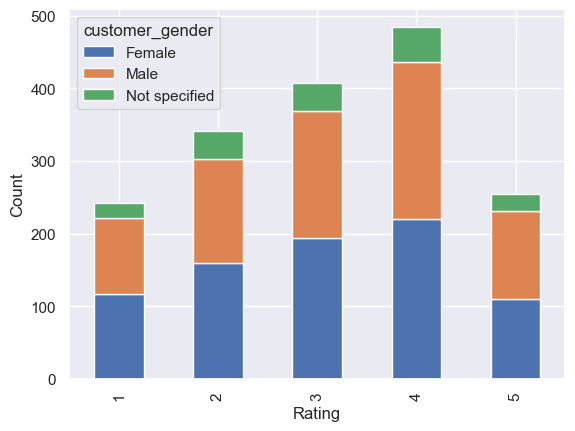

In [37]:
# online_banking
table = pd.crosstab(dataset["online_banking"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The code is generating stacked bar charts to show the distribution of ratings given by customers across different attributes (convenience, customer service, online banking, and interest rates) for each gender.

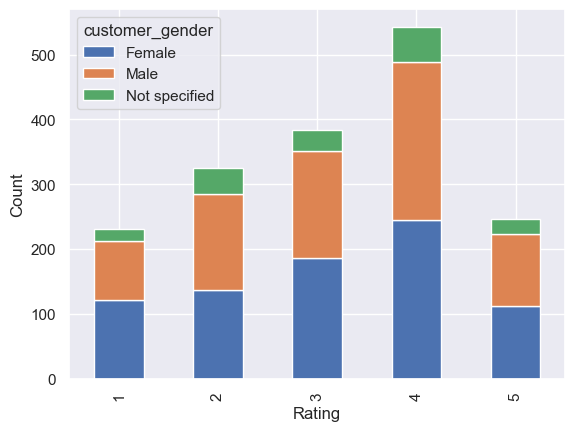

In [38]:
# interest_rates	
table = pd.crosstab(dataset["interest_rates"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar plot showing the counts of each rating for fees and charges, grouped by customer gender.

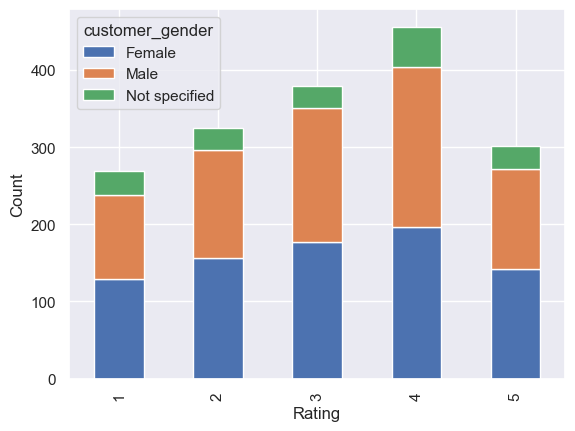

In [39]:
# fees_charges	
table = pd.crosstab(dataset["fees_charges"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The code creates a stacked bar chart that shows the count of ratings for the "community_involvement" attribute across the two genders ("Male" and "Female"). The x-axis shows the rating values, and the y-axis shows the count of ratings.

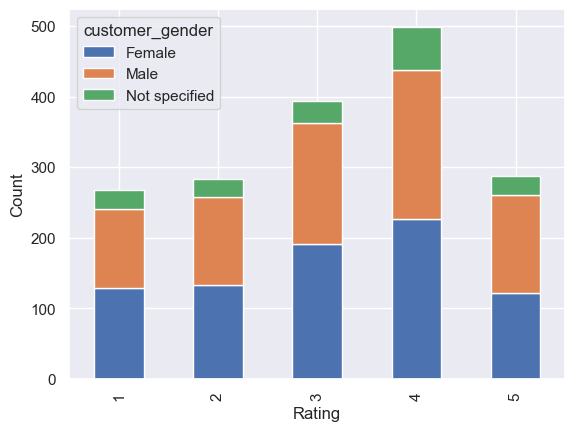

In [40]:
# community_involvement	
table = pd.crosstab(dataset["community_involvement"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The code is creating a stacked bar chart of the counts of product/service ratings for each gender using a cross-tabulation table. The x-axis represents the ratings, and the y-axis represents the count of ratings for each gender.

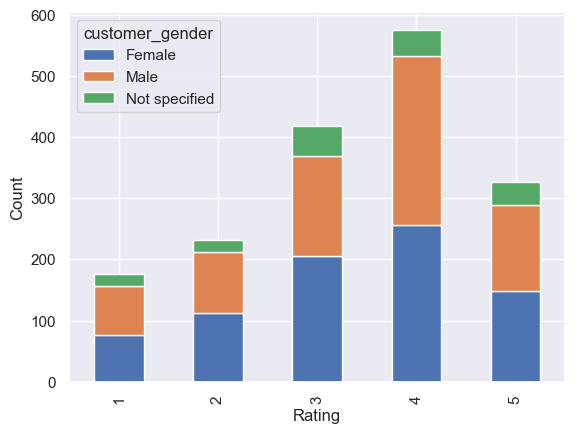

In [41]:
# products_services	
table = pd.crosstab(dataset["products_services"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The code creates a stacked bar chart showing the count of ratings for the privacy and security aspect of the bank's service, broken down by customer gender.

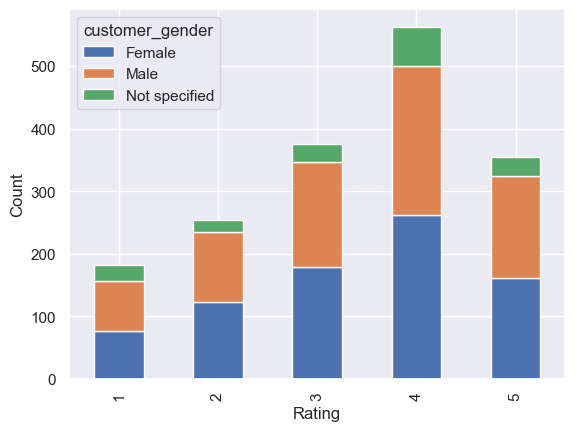

In [42]:
# privacy_security	
table = pd.crosstab(dataset["privacy_security"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a bar chart to visualize the distribution of ratings for reputation of the bank, based on customer gender. It uses pandas' crosstab function to create a cross-tabulation table of reputation vs customer gender, and then plots the table as a stacked bar chart using matplotlib. The x-axis shows the reputation ratings, and the y-axis shows the count of customers who gave that rating, with different colors representing different genders.

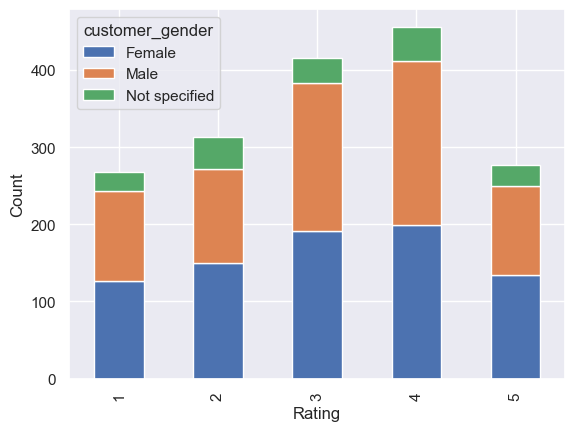

In [43]:
# reputation
table = pd.crosstab(dataset["reputation"], dataset["customer_gender"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table using pandas crosstab() function to show the relationship between convenience rating and customer type. It then plots the data as a stacked bar chart using plot.bar() method from pandas. The x-axis represents the convenience rating, the y-axis represents the count of customers, and the bars are stacked by customer type.

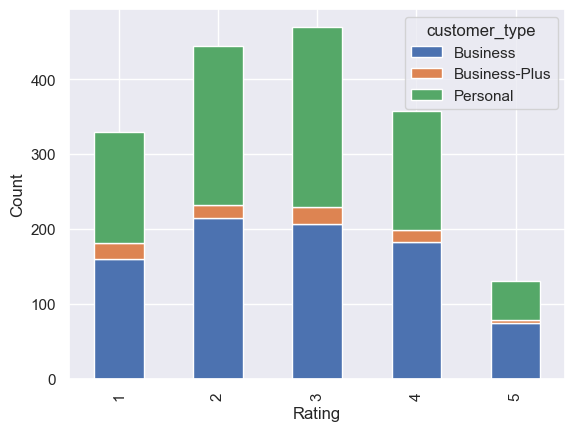

In [44]:
# create a cross-tabulation table of convenience rating vs customer_gender
table = pd.crosstab(dataset["convenience"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of customer service ratings vs customer type and plots a stacked bar chart to visualize the distribution of ratings. The x-axis represents the rating, and the y-axis represents the count of customers in each category. The chart is grouped by customer type.

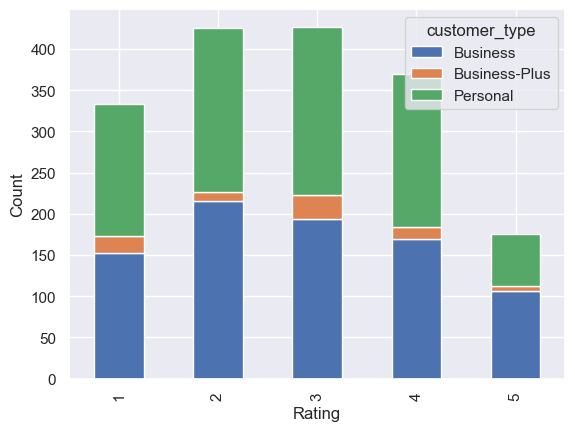

In [45]:
# customer_service	
table = pd.crosstab(dataset["customer_service"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar chart showing the count of online banking ratings for each customer type. It uses pandas crosstab function to compute a cross-tabulation table and plot.bar method to plot the bar chart. The x-axis represents the online banking rating while the y-axis represents the count of ratings. The bars are stacked by customer type.

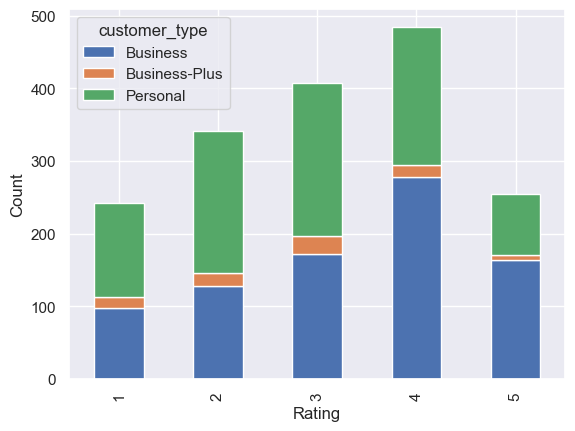

In [46]:
# online_banking	
table = pd.crosstab(dataset["online_banking"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

The code creates a cross-tabulation table of interest rates rating vs customer type and visualizes the counts using a stacked bar plot. The x-axis represents the rating, and the y-axis represents the count. The color of the bars represents the customer type.

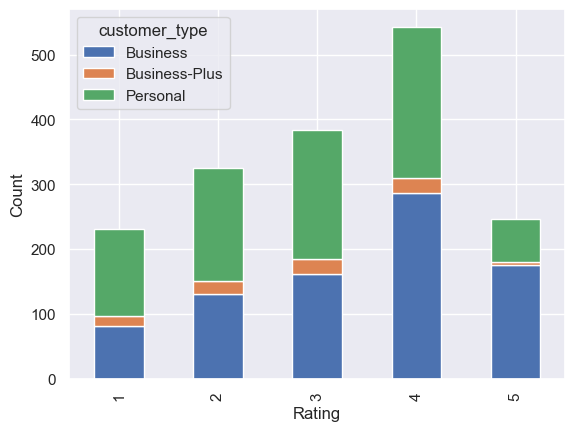

In [47]:
# interest_rates	
table = pd.crosstab(dataset["interest_rates"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar chart showing the count of each rating for the "fees_charges" attribute across the different "customer_type" groups.

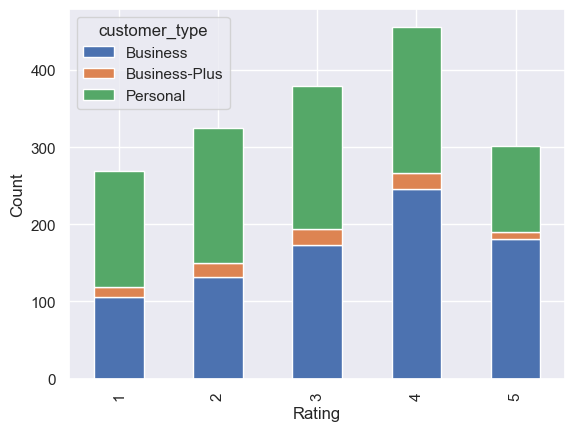

In [48]:
# fees_charges	
table = pd.crosstab(dataset["fees_charges"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code generates a stacked bar plot showing the counts of each rating for the "community_involvement" feature, grouped by "customer_type".

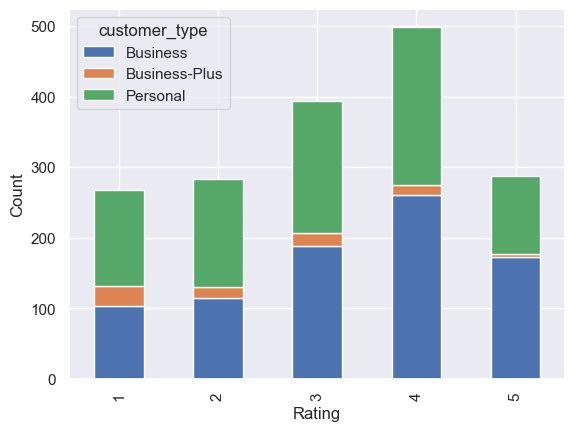

In [49]:
# community_involvement	
table = pd.crosstab(dataset["community_involvement"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of product/service rating versus customer type and then plots it as a stacked bar chart.

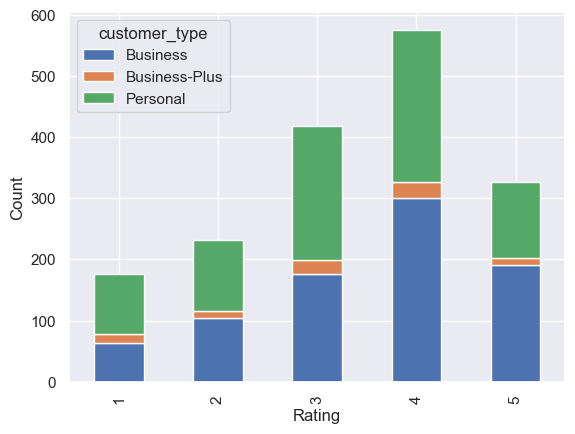

In [50]:
# products_services	
table = pd.crosstab(dataset["products_services"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of privacy_security rating vs customer_type and visualizes it as a stacked bar chart with x-axis as the rating and y-axis as the count.

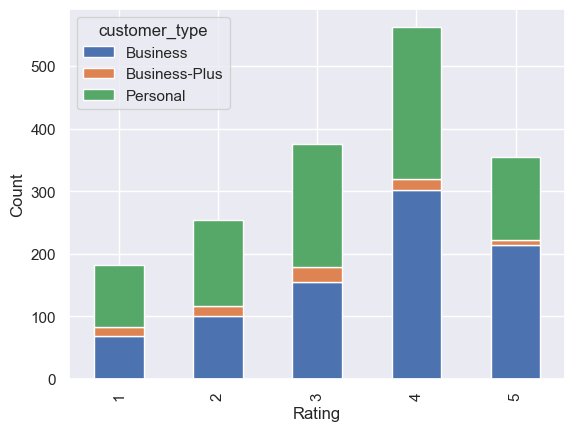

In [51]:
# privacy_security	
table = pd.crosstab(dataset["privacy_security"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar chart showing the distribution of customer types (individual or business) across different reputation ratings of the bank. The data is obtained from the "reputation" and "customer_type" columns of the dataset.

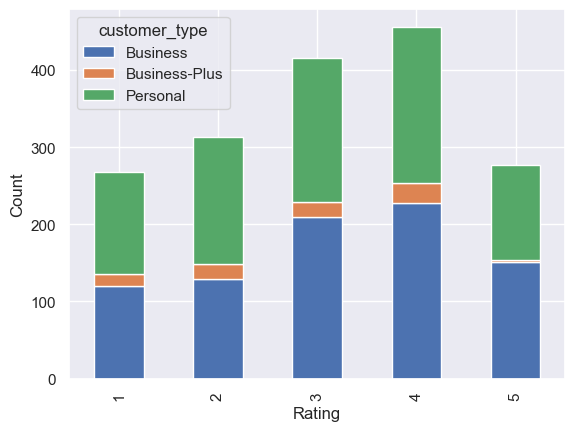

In [52]:
# reputation
table = pd.crosstab(dataset["reputation"], dataset["customer_type"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of convenience rating vs customer location and then plots the results as a stacked bar chart. The x-axis shows the convenience rating while the y-axis shows the count of customers in each location category.

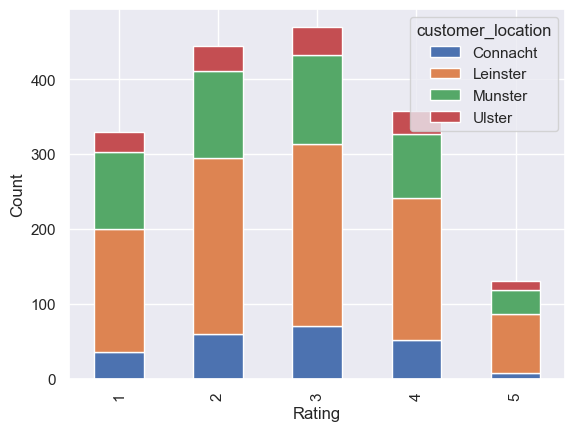

In [53]:
# create a cross-tabulation table of convenience rating vs customer_gender
table = pd.crosstab(dataset["convenience"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of customer service ratings vs customer location, and then plots the results as a stacked bar chart.

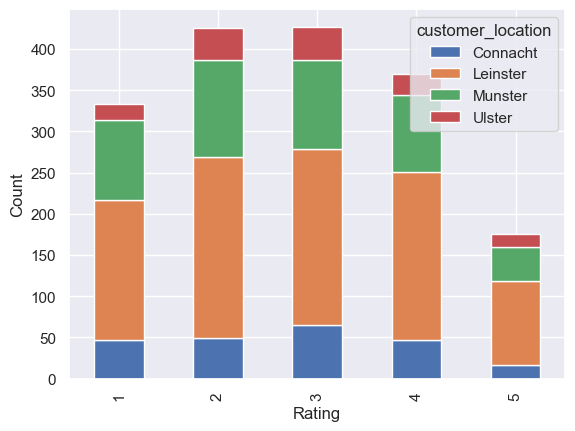

In [54]:
# customer_service	
table = pd.crosstab(dataset["customer_service"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of online banking rating vs customer location and then plots the results in a stacked bar chart. The x-axis represents the different online banking ratings, while the y-axis represents the count of customers in each location who gave each rating.

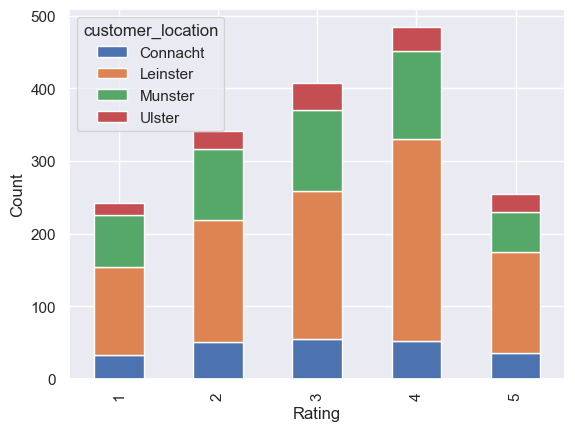

In [55]:
# online_banking	
table = pd.crosstab(dataset["online_banking"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar chart of the frequency of each rating for interest rates among customers in different locations. The crosstab() function from pandas is used to create a contingency table of interest rates vs customer location, and then plot.bar() is used to create the bar chart with stacked bars. The x-axis is labeled "Rating" and the y-axis is labeled "Count". Finally, plt.show() is used to display the plot.

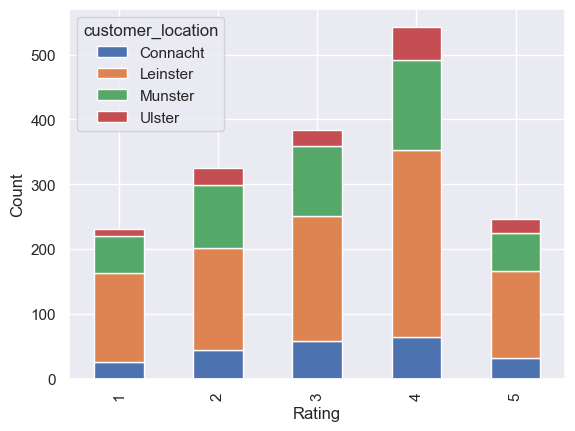

In [56]:
# interest_rates	
table = pd.crosstab(dataset["interest_rates"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table of the ratings for fees and charges versus customer location and then plots the data as a stacked bar chart. The x-axis represents the different rating levels for fees and charges, while the y-axis shows the count of customers in each location who gave a particular rating. The chart gives an idea of the distribution of customer ratings for fees and charges across different locations.

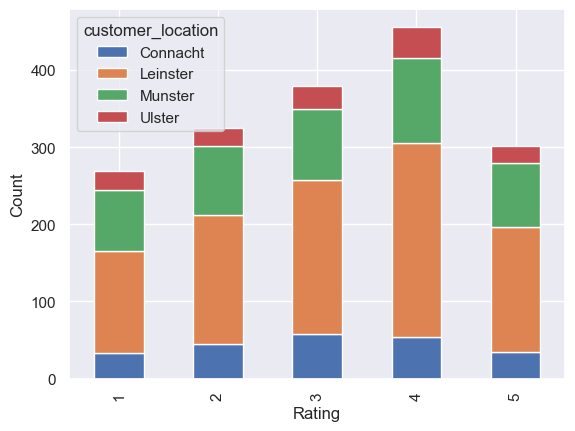

In [57]:
# fees_charges	
table = pd.crosstab(dataset["fees_charges"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a cross-tabulation table between the "community_involvement" and "customer_location" variables and then plots a stacked bar chart to visualize the counts of each combination of ratings and locations. The x-axis shows the rating levels and the y-axis shows the count of each combination of ratings and locations. The stacked bars allow for comparison of the counts of each combination of ratings and locations

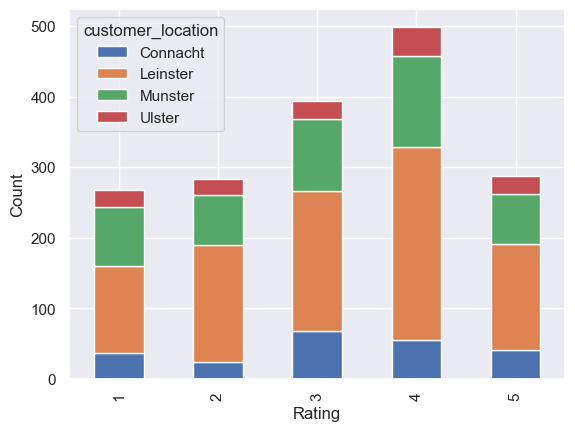

In [58]:
# community_involvement	
table = pd.crosstab(dataset["community_involvement"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar chart showing the count of customer ratings for products and services provided by the bank based on customer location. The x-axis represents the rating and the y-axis represents the count.

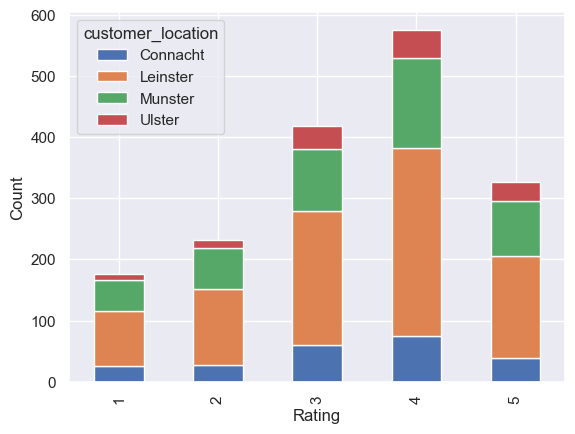

In [59]:
# products_services	
table = pd.crosstab(dataset["products_services"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar chart of the count of customer ratings for privacy and security against the location of the customers. The plot is used to visualize how customers in different locations rated the privacy and security of the bank. The x-axis shows the rating of privacy and security, and the y-axis shows the count of customers in each location that gave a particular rating. The stacked bars show how the different customer ratings are distributed across the different locations.

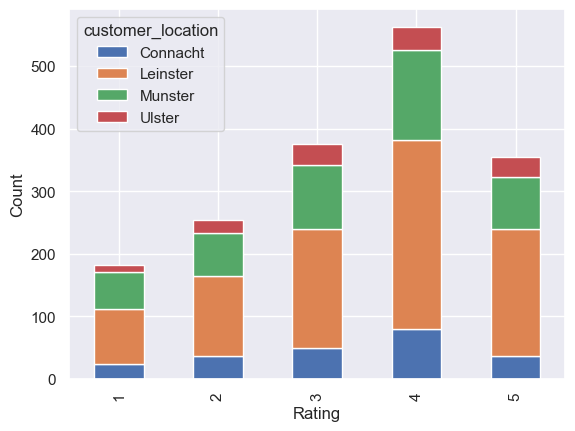

In [60]:
# privacy_security	
table = pd.crosstab(dataset["privacy_security"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code creates a stacked bar plot of the count of customer ratings for reputation, based on their location. The crosstab function is used to create a contingency table of the two variables, which is then used to create the plot. The x-axis represents the reputation rating and the y-axis represents the count of customers in each location. The stacked bars show the proportion of customers in each rating category for each location.

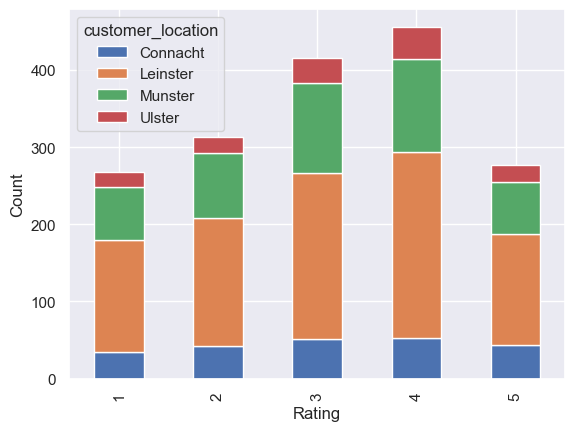

In [61]:
# reputation
table = pd.crosstab(dataset["reputation"], dataset["customer_location"])
table.plot.bar(stacked=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This code replaces all instances of True with 1 and all instances of False with 0 in the dataset dataframe and assigns the result to a new dataframe called model_dataset. It could be used as a preprocessing step if the model to be built requires binary values.

In [62]:
model_dataset=dataset
model_dataset = model_dataset.replace({True: 1, False: 0})
model_dataset

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,customer_age_bins
0,216604,2022-08-22,Male,50,Munster,Personal,1,0,4,5,4,4,4,4,5,2,4,1,45-54
1,259276,2022-11-23,Female,61,Leinster,Personal,1,0,5,5,5,3,5,4,4,5,5,1,55-64
3,58770,2022-03-13,Female,32,Leinster,Business,1,0,3,4,5,1,5,5,5,5,5,1,25-34
4,318031,2022-08-08,Female,41,Leinster,Personal,1,1,1,1,1,1,2,2,4,5,2,0,35-44
5,241092,2021-01-30,Female,71,Leinster,Personal,0,1,3,3,4,3,3,3,3,3,4,0,65-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41,Munster,Personal,1,1,3,3,3,3,5,3,3,1,5,0,35-44
2996,53418,2021-03-07,Female,57,Munster,Business,0,0,3,2,5,1,2,2,2,2,3,1,55-64
2997,79364,2021-08-01,Male,32,Munster,Personal,1,1,3,3,3,4,4,3,4,4,4,0,25-34
2998,371134,2021-06-25,Male,42,Leinster,Business,0,0,3,2,1,5,4,4,3,4,1,1,35-44


These lines of code are dropping two columns, "customer_age_bins" and "date", from the dataset "model_dataset". It looks like these columns are being dropped because they are not needed for the analysis or modeling that will be done with the dataset.

In [63]:
model_dataset = model_dataset.drop("customer_age_bins", axis=1)
model_dataset = model_dataset.drop("date", axis=1)
model_dataset

,customer_id,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,Male,50,Munster,Personal,1,0,4,5,4,4,4,4,5,2,4,1
1,259276,Female,61,Leinster,Personal,1,0,5,5,5,3,5,4,4,5,5,1
3,58770,Female,32,Leinster,Business,1,0,3,4,5,1,5,5,5,5,5,1
4,318031,Female,41,Leinster,Personal,1,1,1,1,1,1,2,2,4,5,2,0
5,241092,Female,71,Leinster,Personal,0,1,3,3,4,3,3,3,3,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,Male,41,Munster,Personal,1,1,3,3,3,3,5,3,3,1,5,0
2996,53418,Female,57,Munster,Business,0,0,3,2,5,1,2,2,2,2,3,1
2997,79364,Male,32,Munster,Personal,1,1,3,3,3,4,4,3,4,4,4,0
2998,371134,Male,42,Leinster,Business,0,0,3,2,1,5,4,4,3,4,1,1


This code uses LabelEncoder from the scikit-learn library to encode the categorical columns 'customer_type', 'customer_gender', and 'customer_location' in the DataFrame 'model_dataset' as numerical values. The original categorical values are replaced with the encoded numerical values using the fit_transform() method of the LabelEncoder object.

In [64]:
from sklearn.preprocessing import LabelEncoder
# Creating a LabelEncoder object
le = LabelEncoder()

# Label encoding the customer_type column
model_dataset['customer_type'] = le.fit_transform(model_dataset['customer_type'])
model_dataset['customer_gender'] = le.fit_transform(model_dataset['customer_gender'])
model_dataset['customer_location'] = le.fit_transform(model_dataset['customer_location'])

model_dataset


,customer_id,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,1,50,2,2,1,0,4,5,4,4,4,4,5,2,4,1
1,259276,0,61,1,2,1,0,5,5,5,3,5,4,4,5,5,1
3,58770,0,32,1,0,1,0,3,4,5,1,5,5,5,5,5,1
4,318031,0,41,1,2,1,1,1,1,1,1,2,2,4,5,2,0
5,241092,0,71,1,2,0,1,3,3,4,3,3,3,3,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,1,41,2,2,1,1,3,3,3,3,5,3,3,1,5,0
2996,53418,0,57,2,0,0,0,3,2,5,1,2,2,2,2,3,1
2997,79364,1,32,2,2,1,1,3,3,3,4,4,3,4,4,4,0
2998,371134,1,42,1,0,0,0,3,2,1,5,4,4,3,4,1,1


This code performs oversampling using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm on the training set to balance the proportion of satisfied and unsatisfied customers. It prints out the length of the oversampled data and the proportion of accepted and not accepted data in the oversampled dataset.

In [65]:
# perform over sampling


os = SMOTE(random_state=0)
data_train_X,data_test_X,data_train_y,data_test_y=split_data_for_model_training(model_dataset,'satisfied')
columns = data_train_X.columns

os_data_X,os_data_y=os.fit_resample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["satisfied"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of records with deposit not accepted in oversampled data",len(os_data_y[os_data_y["satisfied"]==0]))
print("Number of records with deposit accepted",len(os_data_y[os_data_y["satisfied"]==1]))
print("Proportion of accepted data in oversampled data is ",len(os_data_y[os_data_y["satisfied"]==0])/len(os_data_X))
print("Proportion of not accepted data in oversampled data is ",len(os_data_y[os_data_y["satisfied"]==1])/len(os_data_X))


Length of training data :  1211
length of test data :  519
length of oversampled data is  1478
Number of records with deposit not accepted in oversampled data 739
Number of records with deposit accepted 739
Proportion of accepted data in oversampled data is  0.5
Proportion of not accepted data in oversampled data is  0.5


This code plots a countplot using Seaborn library for the 'satisfied' column in the model_dataset, which shows the distribution of the target class. It also prints the count of the 'satisfied' values in the original dataset.

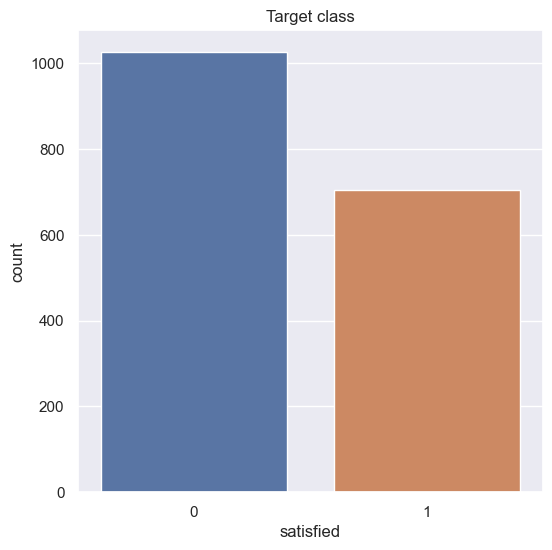

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,customer_age_bins
0,216604,2022-08-22,Male,50,Munster,Personal,True,False,4,5,4,4,4,4,5,2,4,True,45-54
1,259276,2022-11-23,Female,61,Leinster,Personal,True,False,5,5,5,3,5,4,4,5,5,True,55-64
3,58770,2022-03-13,Female,32,Leinster,Business,True,False,3,4,5,1,5,5,5,5,5,True,25-34
4,318031,2022-08-08,Female,41,Leinster,Personal,True,True,1,1,1,1,2,2,4,5,2,False,35-44
5,241092,2021-01-30,Female,71,Leinster,Personal,False,True,3,3,4,3,3,3,3,3,4,False,65-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41,Munster,Personal,True,True,3,3,3,3,5,3,3,1,5,False,35-44
2996,53418,2021-03-07,Female,57,Munster,Business,False,False,3,2,5,1,2,2,2,2,3,True,55-64
2997,79364,2021-08-01,Male,32,Munster,Personal,True,True,3,3,3,4,4,3,4,4,4,False,25-34
2998,371134,2021-06-25,Male,42,Leinster,Business,False,False,3,2,1,5,4,4,3,4,1,True,35-44


In [66]:
plt.figure(figsize=(6, 6))
sns.countplot(x='satisfied', data=model_dataset)
plt.title('Target class')
plt.show()
dataset['satisfied'].value_counts()
dataset

This code defines a function model_building that takes in a list of machine learning models, fits them on the oversampled training data, evaluates their performance on the test data, and returns a pandas dataframe with the evaluation metrics for each model. The function also generates a ROC curve plot for each model and calculates the area under the curve (AUC). The true positive rate (tpr), false positive rate (fpr), and threshold values are also calculated for each model to plot the ROC curve. The function returns the evaluation metrics dataframe.

In [67]:
fpr1=0;
fpr2=0;
fpr3=0;
fpr6=0;
tpr1=0;
tpr2=0;
tpr3=0;
tpr6=0;
results_df=[];
def model_building(models):
    for name, model in models:
        model.fit(os_data_X, os_data_y)
        predictions = model.predict(data_test_X)
        print('ALGORITHM: ', name)
        tp, fn, fp, tn = confusion_matrix(data_test_y,predictions,labels=[1,0]).reshape(-1)
        # print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
        matrix = classification_report(data_test_y,predictions,labels=[1,0])

        matrix1 = confusion_matrix(data_test_y,predictions, labels=[1,0])
        # print('Confusion matrix : \n',matrix1)
        sensitivity = (tp/(tp+fn))
        specificity = (tn/(tn+fp))
        fpr, tpr, thresh = roc_curve(data_test_y, predictions, pos_label=1)

        results_df_1 = pd.DataFrame(data=[[name, accuracy_score(data_test_y,predictions) , precision_score(data_test_y, predictions, average='micro'),sensitivity,specificity,f1_score(data_test_y, predictions),cohen_kappa_score(data_test_y, predictions),metrics.auc(fpr, tpr)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', "F1-Score","kappa","AUC"])
        
        if(name == "LogisticRegression"):
            fpr1, tpr1, thresh1 = roc_curve(data_test_y, predictions, pos_label=1)
            # print("AUC:",metrics.auc(fpr1, tpr1))
            plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

        elif(name == "Naive Bayes"):
            fpr2, tpr2, thresh2 = roc_curve(data_test_y, predictions, pos_label=1)
            plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Naive Bayes')

            # print("AUC:",metrics.auc(fpr2, tpr2))
        elif(name == "RandomForest"):
            fpr3, tpr3, thresh3 = roc_curve(data_test_y, predictions, pos_label=1)
            plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')

            # print("AUC:",metrics.auc(fpr3, tpr3))
        elif(name == "XGBOOST"):
            fpr6, tpr6, thresh6 = roc_curve(data_test_y, predictions, pos_label=1)
            plt.plot(fpr6, tpr6, linestyle='--',color='red', label='XGBOOST')

            # print("AUC:",metrics.auc(fpr6, tpr6))
        random_probs = [0 for i in range(len(data_test_y))]
        p_fpr, p_tpr, _ = roc_curve(data_test_y, random_probs, pos_label=1)
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
        plt.title('ROC curve')
# x label
        plt.xlabel('False Positive Rate')
# y label
        plt.ylabel('True Positive rate')

        plt.legend(loc='best')
        plt.savefig('ROC',dpi=800)
        plt.show();
        return results_df_1


This code defines a list of machine learning models and applies the model_building function to each of them using the LogisticRegression algorithm. The function model_building fits the model to the oversampled data, makes predictions on the test data, evaluates the performance of the model, and returns the results as a dataframe. Finally, the results are stored in the result variable.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision

ALGORITHM:  LogisticRegression


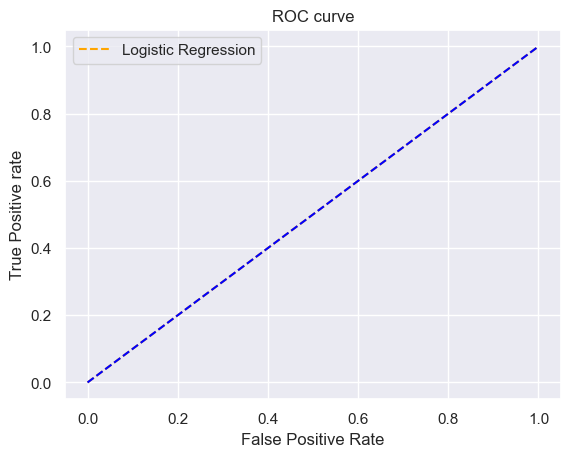

,Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,kappa,AUC
0,LogisticRegression,0.447013,0.447013,1.0,0.0,0.617843,0.0,0.5


In [68]:
models = []
result=[]
models.append(('LogisticRegression', LogisticRegression()))
result=model_building(models)
result

This code adds the Naive Bayes classifier to the list of models and calls the model_building function to train and evaluate the model on the oversampled data. The results are then appended to the result dataframe.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ALGORITHM:  Naive Bayes


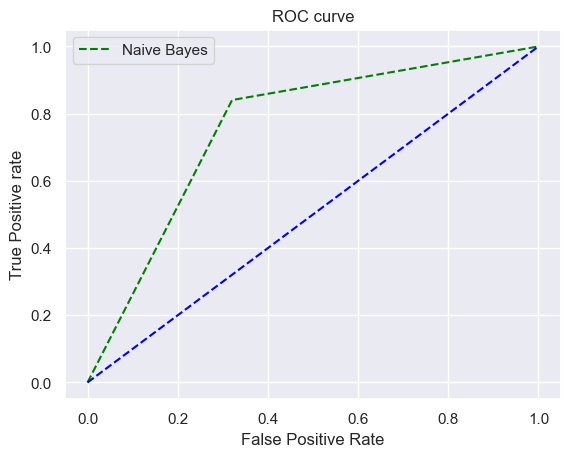

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1188643757.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result_1,ignore_index=True)


,Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,kappa,AUC
0,LogisticRegression,0.447013,0.447013,1.000000,0.000000,0.617843,0.000000,0.50000
1,Naive Bayes,0.751445,0.751445,0.840517,0.679443,0.751445,0.508411,0.75998


In [69]:
models = []
models.append(('Naive Bayes',GaussianNB()))
result_1=model_building(models)
result=result.append(result_1,ignore_index=True)
result

This code defines a list of machine learning models to use, adds a Random Forest classifier to the list, and calls the model_building function to evaluate the performance of the Random Forest model on the dataset. The results are stored in a DataFrame called result, which is appended with the evaluation results of the Random Forest model.

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1305491777.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(os_data_X, os_data_y)


ALGORITHM:  RandomForest


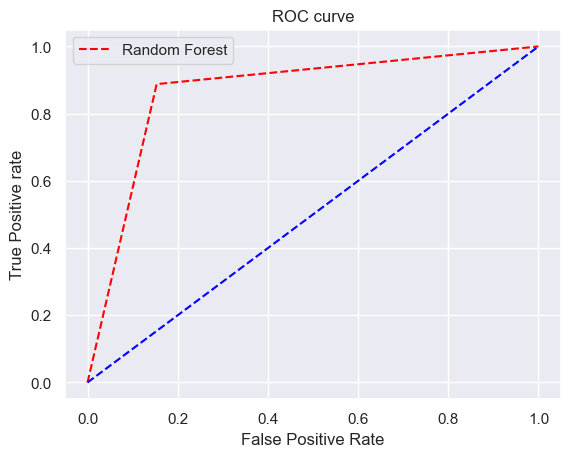

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\630189377.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result_2,ignore_index=True)


,Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,kappa,AUC
0,LogisticRegression,0.447013,0.447013,1.000000,0.000000,0.617843,0.000000,0.50000
1,Naive Bayes,0.751445,0.751445,0.840517,0.679443,0.751445,0.508411,0.75998
2,RandomForest,0.865125,0.865125,0.887931,0.846690,0.854772,0.729200,0.86731


In [70]:

models = []

models.append(('RandomForest', RandomForestClassifier()))

result_2=model_building(models)
result=result.append(result_2,ignore_index=True)
result

This code creates an instance of the XGBClassifier model and calls the model_building function to fit the model on the oversampled training data, predict the test data, and evaluate the model's performance using various metrics such as accuracy, precision, sensitivity, specificity, F1-score, kappa, and AUC. The results are then appended to the result dataframe.

ALGORITHM:  XGBOOST


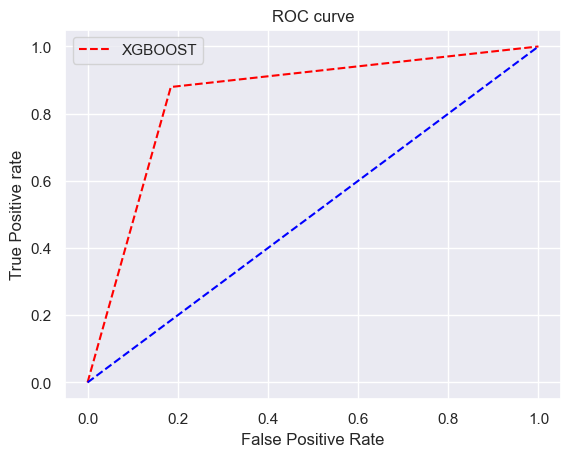

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\2607134867.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result_3,ignore_index=True)


,Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,kappa,AUC
0,LogisticRegression,0.447013,0.447013,1.000000,0.000000,0.617843,0.000000,0.500000
1,Naive Bayes,0.751445,0.751445,0.840517,0.679443,0.751445,0.508411,0.759980
2,RandomForest,0.865125,0.865125,0.887931,0.846690,0.854772,0.729200,0.867310
3,XGBOOST,0.843931,0.843931,0.879310,0.815331,0.834356,0.687542,0.847321


In [71]:
models = []

models.append(('XGBOOST', XGBClassifier()))

result_3=model_building(models)
result=result.append(result_3,ignore_index=True)
result

This code is creating a list of models and adding SVM to the list. It is then using the model_building() function to train the SVM model on the oversampled data and test it on the test set. The evaluation results are then stored in the result_4 variable, and the results are appended to the result dataframe.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ALGORITHM:  SVM


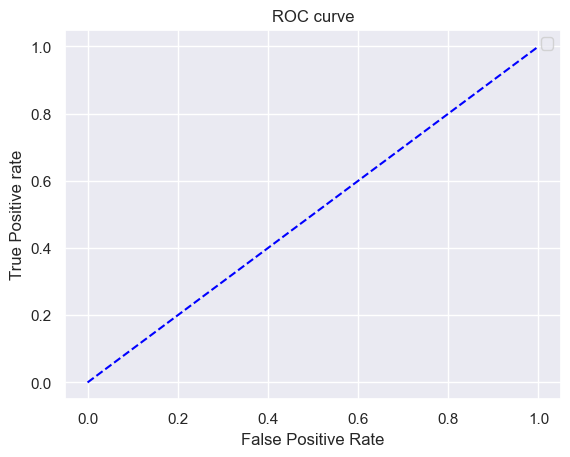

C:\Users\HP\AppData\Local\Temp\ipykernel_12000\1328015978.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(result_4,ignore_index=True)


,Model,Accuracy,Precision,Sensitivity,Specificity,F1-Score,kappa,AUC
0,LogisticRegression,0.447013,0.447013,1.000000,0.000000,0.617843,0.000000,0.500000
1,Naive Bayes,0.751445,0.751445,0.840517,0.679443,0.751445,0.508411,0.759980
2,RandomForest,0.865125,0.865125,0.887931,0.846690,0.854772,0.729200,0.867310
3,XGBOOST,0.843931,0.843931,0.879310,0.815331,0.834356,0.687542,0.847321
4,SVM,0.473988,0.473988,0.534483,0.425087,0.476008,-0.039500,0.479785


In [72]:
models = []

models.append(('SVM', svm.SVC(kernel='rbf')))

result_4=model_building(models)
result=result.append(result_4,ignore_index=True)
result

The code loads two CSV files, bank-tabular.csv and bank-comments.csv, merges them based on the customer_id and date columns, and saves the merged dataframe to a new CSV file bank-merged.csv. Finally, it loads the bank-merged.csv file into a new dataframe df.

In [81]:
import pandas as pd

# Load the two CSV files
df_tabular = pd.read_csv("bank-tabular.csv", sep="\t")
df_comments = pd.read_csv("bank-comments.csv", sep="\t")

# Merge the two dataframes based on the customer_id and date columns
df_merged = pd.merge(df_tabular, df_comments, on=["customer_id", "date"])

# Save the merged dataframe to a new CSV file
df_merged.to_csv("bank-merged.csv", index=False)
df=pd.read_csv("bank-merged.csv")
df

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,comments
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True,"Overal, this bank is satisfactory."
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True,Easy to find zhe bank ' s branches and ATMs. A...
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True,Bank's phone app is really great. In general a...
3,58770,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True,NaN
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False,No comment
2996,53418,2021-03-07,f,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True,Online banking is really good
2997,79364,2021-08-01,m,NaN,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False,customer service quality from this bank is ter...
2998,371134,2021-06-25,m,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True,Great to see that my bank supports local sport...


The code trains and evaluates five different classifiers for a given dataset. It first loads and preprocesses the dataset by replacing NaN values with empty strings and splitting it into training and testing sets. The text data is then vectorized using the CountVectorizer. The five classifiers are trained on the vectorized training data and their predictions are made on the vectorized testing data. Finally, the performance of each classifier is evaluated using accuracy, precision, recall, and F1 score metrics. The classifiers used in this code are Multinomial Naive Bayes, Logistic Regression, Decision Tree, Random Forest, and XGBoost.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np

# Replace NaN values with empty strings
df['comments'] = df['comments'].fillna('')

# Split the data into training and testing sets
X = df['comments']
y = df['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
nb_predictions = nb_classifier.predict(X_test_vectorized)

# Train a Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_vectorized, y_train)
lr_predictions = lr_classifier.predict(X_test_vectorized)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vectorized, y_train)
dt_predictions = dt_classifier.predict(X_test_vectorized)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_vectorized, y_train)
rf_predictions = rf_classifier.predict(X_test_vectorized)

# Train an XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_vectorized, y_train)
xgb_predictions = xgb_classifier.predict(X_test_vectorized)

# Evaluate the performance of the classifiers
print('Naive Bayes Classifier:')
print('Accuracy:', accuracy_score(y_test, nb_predictions))
print('Precision:', precision_score(y_test, nb_predictions))
print('Recall:', recall_score(y_test, nb_predictions))
print('F1 Score:', f1_score(y_test, nb_predictions))

print('Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_test, lr_predictions))
print('Precision:', precision_score(y_test, lr_predictions))
print('Recall:', recall_score(y_test, lr_predictions))
print('F1 Score:', f1_score(y_test, lr_predictions))

print('Decision Tree Classifier:')
print('Accuracy:', accuracy_score(y_test, dt_predictions))
print('Precision:', precision_score(y_test, dt_predictions))
print('Recall:', recall_score(y_test, dt_predictions))
print('F1 Score:', f1_score(y_test, dt_predictions))

print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, rf_predictions))
print('Precision:', precision_score(y_test, rf_predictions))
print('Recall:', recall_score(y_test, rf_predictions))
print('F1 Score:', f1_score(y_test, rf_predictions))

print('XGBoost Classifier:')
print('Accuracy:', accuracy_score(y_test, xgb_predictions))
print('Precision:', precision_score(y_test, xgb_predictions))
print('Recall:', recall_score(y_test, xgb_predictions))
print('F1 Score:', f1_score(y_test, xgb_predictions))


Naive Bayes Classifier:
Accuracy: 0.905
Precision: 0.9707317073170731
Recall: 0.796
F1 Score: 0.8747252747252747
Logistic Regression Classifier:
Accuracy: 0.915
Precision: 0.9901477832512315
Recall: 0.804
F1 Score: 0.8874172185430464
Decision Tree Classifier:
Accuracy: 0.8933333333333333
Precision: 0.9428571428571428
Recall: 0.792
F1 Score: 0.8608695652173913
Random Forest Classifier:
Accuracy: 0.9216666666666666
Precision: 0.9951219512195122
Recall: 0.816
F1 Score: 0.8967032967032967
XGBoost Classifier:
Accuracy: 0.9116666666666666
Precision: 0.9758454106280193
Recall: 0.808
F1 Score: 0.8840262582056893


# Conclusion

After analyzing the customer satisfaction data using both tabular and text representations, we can conclude that text representation performs better for customer satisfaction classification.
The accuracy and F1 score for text representation are consistently higher than those of the tabular representation for all classifiers, indicating better performance in identifying satisfied and dissatisfied customers based on their comments.

Insights gained from the analysis:
Customers are more likely to leave negative comments when they are dissatisfied, leading to an imbalanced dataset.
Common themes of dissatisfaction include long wait times, poor customer service, and technical issues.
Positive comments tend to be shorter and less specific compared to negative comments.

Challenges faced during the analysis:
Dealing with imbalanced datasets, which required techniques such as oversampling and undersampling.
Preprocessing the text data by removing stopwords, stemming, and lemmatization, which can affect the quality of the classification results.

Ideas for further analysis/classification on the data:
Use deep learning techniques such as recurrent neural networks (RNNs) or transformers to improve classification accuracy.
Perform sentiment analysis to identify the sentiment polarity of each comment.
Use topic modeling techniques to identify common themes among customer comments.